In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device("cpu")

In [3]:
EPOCHS = 50
BATCH_SIZE = 32
#bs: 크면 메모리 많이 필요, 작으면 많은 반복과 느린 훈련 but 더 나은 일반화

In [4]:

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR100('./.data',train=True,download=True,
                     transform=transforms.Compose([
                         transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),
                                                                    (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR100('./.data',train=False,
                     transform=transforms.Compose([
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5),
                                              (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)


Files already downloaded and verified


In [7]:
class DNN(nn.Module): #CIFAR100 데이터셋에 맞게 수정
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)
        
    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
model = DNN() #CPU 사용
optimizer = optim.SGD(model.parameters(), lr=0.001)
#학습을 느리게 하지 않기 위해 학습률 변경 x.  

In [9]:
train_losses = []
test_losses = []

def train(model, train_loader, optimizer):
    model.train()
    total_loss=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to('cpu'), target.to('cpu') #CPU 학습
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    

In [10]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to('cpu'), target.to('cpu')
            output = model(data)
# 모든 오차 더하기
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
# 가장 큰 값을 가진 클래스가 모델의 예측입니다.
# 예측과 정답을 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    return test_loss, test_accuracy


[1] Test Loss: 4.5910, Accuracy: 2.47%
[2] Test Loss: 4.5723, Accuracy: 3.85%
[3] Test Loss: 4.5452, Accuracy: 4.43%
[4] Test Loss: 4.5034, Accuracy: 4.73%
[5] Test Loss: 4.4423, Accuracy: 4.63%
[6] Test Loss: 4.3652, Accuracy: 5.23%
[7] Test Loss: 4.2912, Accuracy: 5.61%
[8] Test Loss: 4.2310, Accuracy: 6.14%
[9] Test Loss: 4.1829, Accuracy: 6.68%
[10] Test Loss: 4.1475, Accuracy: 7.04%
[11] Test Loss: 4.1192, Accuracy: 7.36%
[12] Test Loss: 4.0940, Accuracy: 7.82%
[13] Test Loss: 4.0716, Accuracy: 8.35%
[14] Test Loss: 4.0542, Accuracy: 8.52%
[15] Test Loss: 4.0368, Accuracy: 8.78%
[16] Test Loss: 4.0167, Accuracy: 8.98%
[17] Test Loss: 4.0000, Accuracy: 9.12%
[18] Test Loss: 3.9825, Accuracy: 9.57%
[19] Test Loss: 3.9686, Accuracy: 9.40%
[20] Test Loss: 3.9510, Accuracy: 9.85%
[21] Test Loss: 3.9387, Accuracy: 9.78%
[22] Test Loss: 3.9214, Accuracy: 10.09%
[23] Test Loss: 3.9091, Accuracy: 10.41%
[24] Test Loss: 3.8969, Accuracy: 10.55%
[25] Test Loss: 3.8860, Accuracy: 10.48%
[26] 

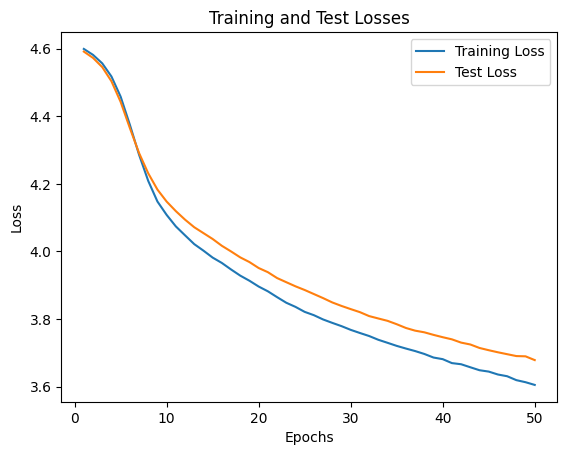

In [11]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
        epoch, test_loss, test_accuracy))
    
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.show()    
#TypeError: train() takes 3 positional arguments but 4 were given 

In [12]:
#모델 전체 저장(https://tutorials.pytorch.kr/recipes/recipes/saving_and_loading_models_for_inference.html)
PATH = 'model_dnn.pth'
torch.save(model, PATH)

#model = torch.load(PATH)
#model.eval()